In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [6]:
sales_of_company_x = pd.read_csv("D:\Python3\Machine_learning2\Временные_ряды/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("D:\Python3\Machine_learning2\Временные_ряды/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("D:\Python3\Machine_learning2\Временные_ряды/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("D:\Python3\Machine_learning2\Временные_ряды/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("D:\Python3\Machine_learning2\Временные_ряды/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("D:\Python3\Machine_learning2\Временные_ряды/daily-total-female-births-in-cal.csv")

In [9]:
female_births.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

### female_births стационарный ряд

In [15]:
births = female_births.Count

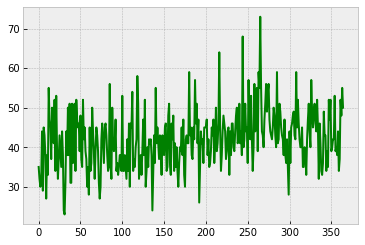

In [16]:
with plt.style.context('bmh'):
    plt.plot(births, color = 'green')

In [17]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [18]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


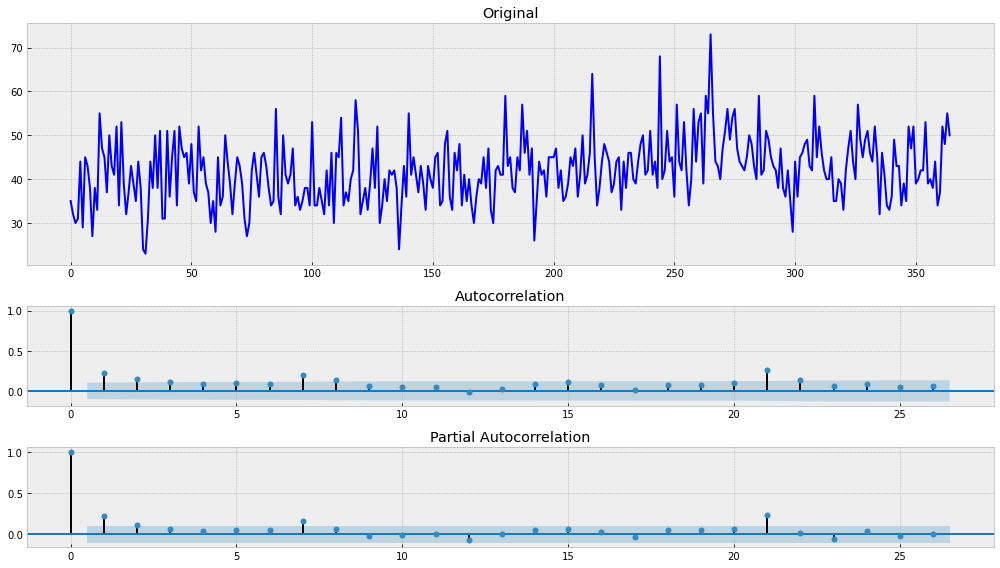

In [19]:
tsplot(births)

In [21]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

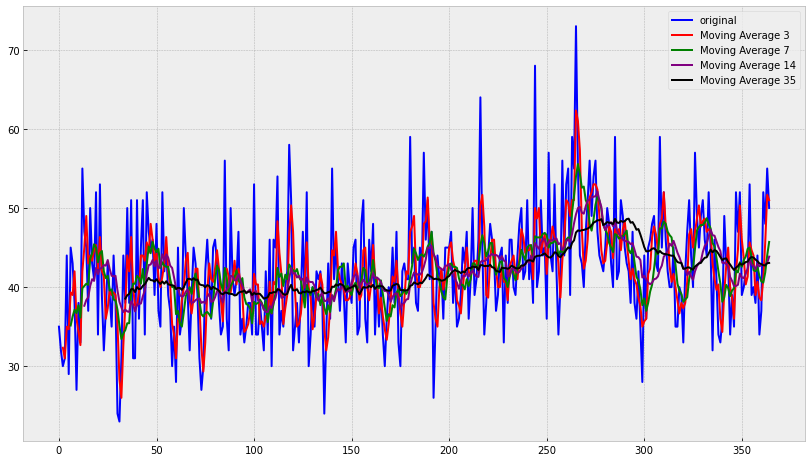

In [25]:
windows = [3,7,14,35]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(births, color='blue',label='original')
    for i in range(len(windows)):
        ser = moving_average(births, windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='Moving Average {}'.format(windows[i]))
    plt.legend()

In [26]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

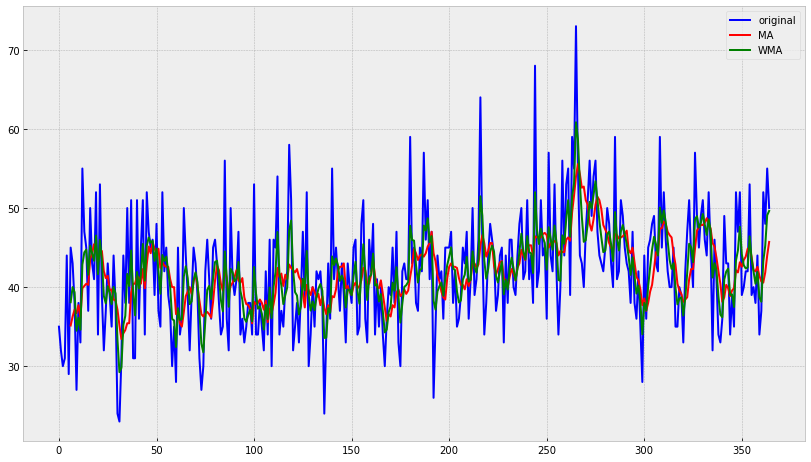

In [27]:
wma = weighted_moving_average(births, 7, [1,1,2,3,5,8,13])
ma = moving_average(births, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(births, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

In [29]:
series = births
wma_fib = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(series, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(series, 7, [1,2,4,8,16,32,64])

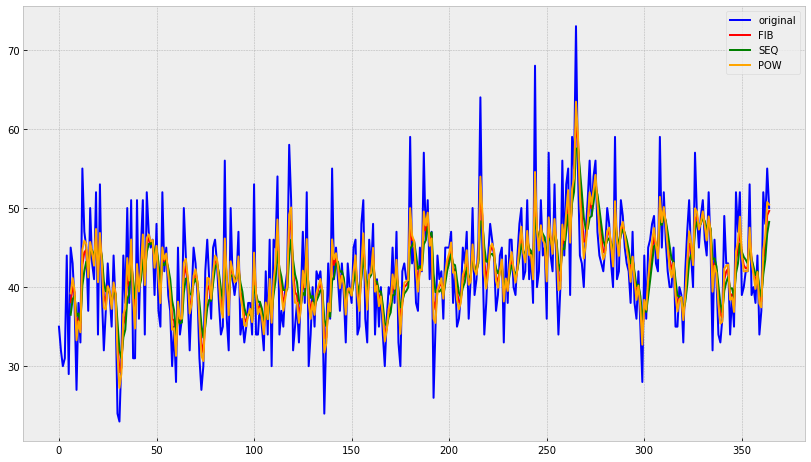

In [30]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

In [34]:
births

0      35
1      32
2      30
3      31
4      44
       ..
360    37
361    52
362    48
363    55
364    50
Name: Count, Length: 365, dtype: int64

In [42]:
wma_pow = wma_pow.fillna(0)
wma_pow

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
360    37.440945
361    44.716535
362    46.393701
363    50.755906
364    50.425197
Name: Count, Length: 365, dtype: float64

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print("MSE",mean_squared_error(births, wma_pow))
print("R^2",r2_score(births, wma_pow))

MSE 33.31355025449776
R^2 0.38135187513183466
